<a href="https://colab.research.google.com/github/V-Gopi-Kiran/Gopi-Kiran/blob/main/Performing_EDA_on_a_cricket_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perform  Exploratory Data Analysis on England tour of India 2021 Dataset



### Q 1: Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Q2 : Load the 3 datasets ( batting, bowling and combined )
---



In [ ]:
bat = pd.read_csv('/content/batting.csv')
ball = pd.read_csv('/content/bowling.csv')
combined = pd.read_csv('/content/combined.csv')


### Q 3: Display top 3 values of batting DataFrame

In [ ]:
bat.head(3)

,Player,Matches,innings,notouts,runs,best,average,balls,strike_rate,hundreds,fifties,zeros,fours,sixes
0,JE Root,4,8,0,368,218,46.00,676,54.43,1,0,0,35,2
1,JC Buttler,1,2,0,54,30,27.00,91,59.34,0,0,0,7,1
2,BA Stokes,4,8,0,203,82,25.37,403,50.37,0,2,0,22,5


### Q4 : Display no of rows and columns in every dataframe

In [ ]:
rows = len(bat.axes[0])
columns = len(bat.axes[1])
print("In the batting dataFrame, the number of Rows is " + str(rows) + " and the number of columns is " + str(columns))

rows = len(ball.axes[0])
columns = len(ball.axes[1])
print("In the bowling dataFrame, the number of Rows is " + str(rows) + " and the number of columns is " + str(columns))

rows = len(combined.axes[0])
columns = len(combined.axes[1])
print("In the combined dataFrame, the number of Rows is " + str(rows) + " and the number of columns is " + str(columns))

In the batting dataFrame, the number of Rows is 31 and the number of columns is 14
In the bowling dataFrame, the number of Rows is 16 and the number of columns is 13
In the combined dataFrame, the number of Rows is 31 and the number of columns is 12


## Analysis and Visualisation

### Q5: Top 5 run scorers

In [ ]:
players_with_highest_runs = combined.nlargest(5, ['runs_scored'])
players_with_highest_runs 

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
0,JE Root,4,368,218,46.00,1,0,45.0,141,6,5/8,23.50
18,RG Sharma,4,345,161,57.50,1,1,0.0,0,0,NaN,0.00
19,RR Pant,4,270,101,54.00,1,2,0.0,0,0,NaN,0.00
2,BA Stokes,4,203,82,25.37,0,2,42.4,153,5,4/89,30.60
20,R Ashwin,4,189,106,31.50,1,0,188.1,471,32,6/61,14.71


### Q6 : Plot a graph for top 5 run scorers in the series

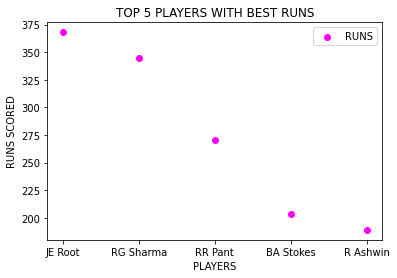

In [ ]:
plt.scatter(players_with_highest_runs['Player'], players_with_highest_runs['runs_scored'], color = 'magenta')
plt.legend(['RUNS'])
plt.xlabel('PLAYERS')
plt.ylabel('RUNS SCORED')
plt.title('TOP 5 PLAYERS WITH BEST RUNS')
plt.show()

### Q7: Top 5 wicket takers

In [ ]:
top_5_wicket_takers = combined.nlargest(5, ['wickets'])
top_5_wicket_takers

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
20,R Ashwin,4,189,106,31.50,1,0,188.1,471,32,6/61,14.71
25,AR Patel,3,55,43,13.75,0,0,27.4,286,27,6/38,10.59
11,MJ Leach,4,48,14,8.00,0,0,161.0,517,18,4/54,28.72
4,MM Ali,1,49,43,24.50,0,0,61.0,226,8,4/98,28.25
15,JM Anderson,3,12,10,4.00,0,0,65.5,127,8,3/17,15.87


### Q8 : Plot the top 5 wicket takers of the series ( Bar Graph)


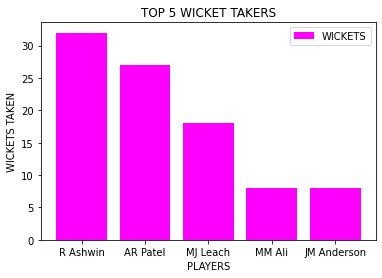

In [ ]:
plt.bar(top_5_wicket_takers['Player'], top_5_wicket_takers['wickets'], color = 'magenta')
plt.legend(['WICKETS'])
plt.xlabel('PLAYERS')
plt.ylabel('WICKETS TAKEN')
plt.title('TOP 5 WICKET TAKERS')
plt.show()

### Q9: Best All-round performers
#### Use bat avg > 20 and bowling avg in between 20 to 30 as criteria

##### To judge allrounder, bowling average should be least and batting average should be highest

In [ ]:
batting_average_criteria = combined[combined["bat_avg"] > 20]
display (batting_average_criteria)
bowling_average_criteria_1 = combined[combined["bw_avg"] > 20]
bowling_average_criteria_2 = bowling_average_criteria_1[bowling_average_criteria_1["bw_avg"] < 30]
display (bowling_average_criteria_2) 
common_players = batting_average_criteria.merge(bowling_average_criteria_2, on=['bat_avg', 'bw_avg'])
print(common_players[['Player_x', 'bat_avg', 'bw_avg']])
max_bat_avg = common_players["bat_avg"].max()
best_all_rounder = common_players[common_players['bat_avg']==max_bat_avg]
print("The best all rounder player is: \n", best_all_rounder[['Player_x', 'bat_avg', 'bw_avg']]) 

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
0,JE Root,4,368,218,46.00,1,0,45.0,141,6,5/8,23.50
1,JC Buttler,1,54,30,27.00,0,0,0.0,0,0,NaN,0.00
2,BA Stokes,4,203,82,25.37,0,2,42.4,153,5,4/89,30.60
3,DW Lawrence,3,149,50,24.83,0,1,0.0,0,0,NaN,0.00
4,MM Ali,1,49,43,24.50,0,0,61.0,226,8,4/98,28.25
17,Washington Sundar,3,181,96,90.50,0,2,38.4,130,2,1/1,65.00
18,RG Sharma,4,345,161,57.50,1,1,0.0,0,0,NaN,0.00
19,RR Pant,4,270,101,54.00,1,2,0.0,0,0,NaN,0.00
20,R Ashwin,4,189,106,31.50,1,0,188.1,471,32,6/61,14.71
21,V Kohli,4,172,72,28.66,0,2,0.0,0,0,NaN,0.00


,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
0,JE Root,4,368,218,46.0,1,0,45.0,141,6,5/8,23.50
4,MM Ali,1,49,43,24.5,0,0,61.0,226,8,4/98,28.25
11,MJ Leach,4,48,14,8.0,0,0,161.0,517,18,4/54,28.72
26,Mohammed Siraj,2,20,16,10.0,0,0,26.0,68,3,2/45,22.66
27,I Sharma,4,26,10,6.5,0,0,59.0,160,6,2/22,26.66
29,Kuldeep Yadav,1,3,3,1.5,0,0,12.2,41,2,2/25,20.50


  Player_x  bat_avg  bw_avg
0  JE Root     46.0   23.50
1   MM Ali     24.5   28.25
The best all rounder player is: 
   Player_x  bat_avg  bw_avg
0  JE Root     46.0    23.5


### Q 10: Plot the best allrounder graph ( Bar Graph)

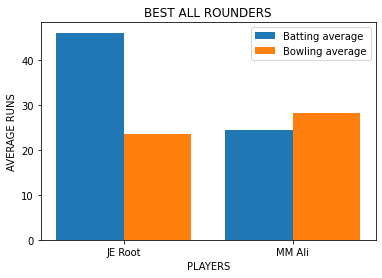

In [ ]:
x_axis = np.arange(len(common_players['Player_x']))
plt.bar(x_axis -0.2, common_players['bat_avg'], width=0.4, label = 'Batting average')
plt.bar(x_axis +0.2, common_players['bw_avg'], width=0.4, label = 'Bowling average')
plt.legend()
plt.xticks(x_axis, common_players['Player_x'])
plt.xlabel('PLAYERS')
plt.ylabel('AVERAGE RUNS')
plt.title('BEST ALL ROUNDERS')
plt.show()

### Q11: Who has the best batting average?

In [ ]:
max_batting_average = combined["bat_avg"].max()
combined[combined["bat_avg"] == max_batting_average]

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
17,Washington Sundar,3,181,96,90.5,0,2,38.4,130,2,1/1,65.0


### Q12 : Who has the best bowling average?

In [ ]:
max_bowling_average = combined["bw_avg"].max()
combined[combined["bw_avg"] == max_bowling_average]

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
17,Washington Sundar,3,181,96,90.5,0,2,38.4,130,2,1/1,65.0


### Q13 : Who has the highest strike rate?

In [ ]:
max_strike_rate = ball["strike_rate"].max()
ball[ball["strike_rate"] == max_strike_rate]

,Player,Matches,innings,overs,maidens,runs,wickets,best,Average,economy,strike_rate,fives,tens
8,Washington Sundar,3,5,38.4,3,130,2,1/1,65.0,3.36,116.0,0,0


### Q14 : How many people have scored Centuries. List them

In [ ]:
players_who_scored_centuries = combined[combined["runs_scored"] >= 100]
number_of_players_who_scored_centuries  = len(players_who_scored_centuries)
print("The number of Players who scored centuries are " + str(number_of_players_who_scored_centuries))
players_who_scored_centuries



The number of Players who scored centuries are 13


,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg
0,JE Root,4,368,218,46.00,1,0,45.0,141,6,5/8,23.50
2,BA Stokes,4,203,82,25.37,0,2,42.4,153,5,4/89,30.60
3,DW Lawrence,3,149,50,24.83,0,1,0.0,0,0,NaN,0.00
5,OJ Pope,4,153,34,19.12,0,0,0.0,0,0,NaN,0.00
6,DP Sibley,4,134,87,16.75,0,1,0.0,0,0,NaN,0.00
17,Washington Sundar,3,181,96,90.50,0,2,38.4,130,2,1/1,65.00
18,RG Sharma,4,345,161,57.50,1,1,0.0,0,0,NaN,0.00
19,RR Pant,4,270,101,54.00,1,2,0.0,0,0,NaN,0.00
20,R Ashwin,4,189,106,31.50,1,0,188.1,471,32,6/61,14.71
21,V Kohli,4,172,72,28.66,0,2,0.0,0,0,NaN,0.00


### Q15 : How many people have got 5 wicket hauls?

In [ ]:
players_who_got_5_wicket_haul = combined[combined["wickets"] >= 5] 
number_of_players_who_got_5_wicket_haul  = len(players_who_got_5_wicket_haul)
print("The number of Players who got five wicket hauls are " + str(number_of_players_who_got_5_wicket_haul))

The number of Players who got five wicket hauls are 9


### Q16: Who has got highest wickets in an inning?

In [ ]:
ball['wickets_per_innings'] = (ball['wickets'] / ball['innings'])
player_with_highest_wickets = ball.loc[ball["wickets_per_innings"].idxmax()]
print("The player with the highest wickets in an inning is: \n", player_with_highest_wickets[['Player', 'wickets_per_innings']])

The player with the highest wickets in an inning is: 
 Player                 AR Patel
wickets_per_innings         4.5
Name: 10, dtype: object


### Q 17. Who has got best figure? ( More wicket and less runs given)

In [ ]:
x = combined['best_fig'].copy()
x = x.fillna('/')
combined['max_w'] = x.apply(lambda x:x.split('/')[0])
combined['min_r'] = x.apply(lambda x:x.split('/')[1])
max_w = combined['max_w'].max()
max_wicket_players = combined[combined['max_w']==max_w]
best_fig_player = max_wicket_players.iloc[1:,:]
display (best_fig_player)

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg,max_w,min_r
25,AR Patel,3,55,43,13.75,0,0,27.4,286,27,6/38,10.59,6,38


### Q 18. Percentage runs and wickets for teams 
#### England ( till 17)
#### India ( after 17)

In [ ]:
england = combined.iloc[:18,:]
india = combined.iloc[18:,:]
england['percent_runs'] = (england['runs_scored'] / england['runs_scored'].sum()) * 100
england['percent_wickets'] = (england['wickets'] / england['wickets'].sum()) * 100
india['percent_runs'] = (india['runs_scored'] / india['runs_scored'].sum()) * 100
india['percent_wickets'] = (india['wickets'] / india['wickets'].sum()) * 100
display (england)
display (india)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg,max_w,min_r,percent_runs,percent_wickets
0,JE Root,4,368,218,46.00,1,0,45.0,141,6,5/8,23.50,5,8,22.009569,10.000000
1,JC Buttler,1,54,30,27.00,0,0,0.0,0,0,NaN,0.00,,,3.229665,0.000000
2,BA Stokes,4,203,82,25.37,0,2,42.4,153,5,4/89,30.60,4,89,12.141148,8.333333
3,DW Lawrence,3,149,50,24.83,0,1,0.0,0,0,NaN,0.00,,,8.911483,0.000000
4,MM Ali,1,49,43,24.50,0,0,61.0,226,8,4/98,28.25,4,98,2.930622,13.333333
5,OJ Pope,4,153,34,19.12,0,0,0.0,0,0,NaN,0.00,,,9.150718,0.000000
6,DP Sibley,4,134,87,16.75,0,1,0.0,0,0,NaN,0.00,,,8.014354,0.000000
7,Z Crawley,2,67,53,16.75,0,1,0.0,0,0,NaN,0.00,,,4.007177,0.000000
8,DM Bess,2,64,34,16.00,0,0,51.0,197,5,4/76,39.40,4,76,3.827751,8.333333
9,BT Foakes,3,78,42,15.60,0,0,0.0,0,0,NaN,0.00,,,4.665072,0.000000


,Player,Matches,runs_scored,highest,bat_avg,hundreds,fifties,overs,runs_given,wickets,best_fig,bw_avg,max_w,min_r,percent_runs,percent_wickets
18,RG Sharma,4,345,161,57.50,1,1,0.0,0,0,NaN,0.00,,,23.809524,0.000000
19,RR Pant,4,270,101,54.00,1,2,0.0,0,0,NaN,0.00,,,18.633540,0.000000
20,R Ashwin,4,189,106,31.50,1,0,188.1,471,32,6/61,14.71,6,61,13.043478,41.025641
21,V Kohli,4,172,72,28.66,0,2,0.0,0,0,NaN,0.00,,,11.870255,0.000000
22,CA Pujara,4,133,73,22.16,0,1,0.0,0,0,NaN,0.00,,,9.178744,0.000000
23,Shubman Gill,4,119,50,19.83,0,1,0.0,0,0,NaN,0.00,,,8.212560,0.000000
24,AM Rahane,4,112,67,18.66,0,1,0.0,0,0,NaN,0.00,,,7.729469,0.000000
25,AR Patel,3,55,43,13.75,0,0,27.4,286,27,6/38,10.59,6,38,3.795721,34.615385
26,Mohammed Siraj,2,20,16,10.00,0,0,26.0,68,3,2/45,22.66,2,45,1.380262,3.846154
27,I Sharma,4,26,10,6.50,0,0,59.0,160,6,2/22,26.66,2,22,1.794341,7.692308


### Q19 . Plot a pie chart for displaying the England run percentage

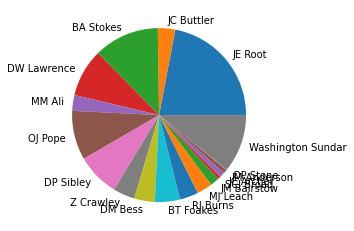

In [ ]:
plt.pie(england["percent_runs"], labels = england["Player"])
plt.show()

### Q20. Plot a pie chart for displaying the India run percentage

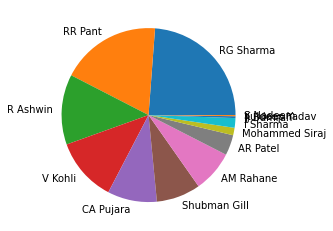

In [ ]:
plt.pie(india["percent_runs"], labels = india["Player"])
plt.show()